# Prompt 2: Are certain nature-based solutions more inequitably distributed? 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import json
import requests
import geopandas as gpd

In [2]:
master_data = pd.read_csv("master_data.csv")
master_data

,Census_Tract,OBJECTID,ID,REGION,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,ACSUNEMPBAS,...,linkage_diffuse_value,linkage_intensified_value,linkage_channelized_value,linkage_large_value,linkage_reglink_value,displacement_typos_value,communityconcern_value,disadvcommunity_value,acres,census_tract_y
0,6001400100,11497.5,60014001001,9.0,1517.500000,1507.000000,1206.000000,637.000000,705.50,793.500000,...,0,135,529,305,515,0,0,0,1718,6001400100
1,6001400200,11499.5,60014002001,9.0,991.500000,983.500000,802.500000,415.000000,428.00,617.000000,...,0,0,0,0,0,0,0,0,143,6001400200
2,6001400300,11502.5,60014003002,9.0,1264.500000,1254.750000,1006.000000,604.750000,668.50,818.250000,...,0,0,0,0,0,1,1,0,274,6001400300
3,6001400400,11506.0,60014004002,9.0,1393.000000,1389.000000,1052.333333,580.000000,628.00,867.333333,...,0,0,0,0,0,178,0,0,178,6001400400
4,6001400500,11509.0,60014005002,9.0,1340.333333,1340.333333,1006.000000,547.666667,589.00,885.333333,...,0,0,0,0,0,146,1,0,146,6001400500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6097154100,35583.5,60971541002,9.0,921.500000,921.500000,754.250000,348.000000,445.75,538.750000,...,40900,28065,30859,0,81194,0,0,0,143346,6097154100
1751,6097154201,35587.5,60971542012,9.0,946.750000,940.250000,672.250000,353.750000,360.25,461.500000,...,1752,655,56,0,1685,0,0,0,6597,6097154201
1752,6097154202,35591.5,60971542022,9.0,1563.750000,1548.750000,1152.500000,630.000000,639.25,820.750000,...,16351,17266,3606,33693,10640,0,0,0,46891,6097154202
1753,6097154304,35595.5,60971543042,9.0,581.750000,564.000000,435.750000,249.000000,443.00,291.000000,...,81066,105815,20722,26840,57564,0,27,0,221362,6097154304


In [3]:
#finds demographic factor most corrolated with given nature based solution
def most_corrolated_demographic(data, dem_factors, nbs_factor):
    final_corr = 0
    final_factor = ""
    for i, v in enumerate(dem_factors):
        corr = np.corrcoef(data[v], data[nbs_factor])[0][1]
        if(corr > final_corr):
            final_corr = corr
            final_factor = v
    print(f"{nbs_factor} has a {final_corr} corrolation with {final_factor}")
    return [nbs_factor, final_corr]

#finds demographic factor least corrolated with given nature based solution
def least_corrolated_demographic(data, dem_factors, nbs_factor):
    final_corr = 0
    final_factor = ""
    for i, v in enumerate(dem_factors):
        corr = np.corrcoef(data[v], data[nbs_factor])[0][1]
        if(corr < final_corr):
            final_corr = corr
            final_factor = v
    print(f"{nbs_factor} has a {final_corr} corrolation with {final_factor}")
    return [nbs_factor, final_corr]



In [4]:
#finds nbs factor most corrolated with given demographic factor
def most_corrolated_nbs(data, dem_factor, nbs_factors):
    final_corr = 0
    final_factor = ""
    for i, v in enumerate(nbs_factors):
        corr = np.corrcoef(data[dem_factor], data[v])[0][1]
        if(corr > final_corr):
            final_corr = corr
            final_factor = v
    print(f"{dem_factor} has a {final_corr} corrolation with {final_factor}")
    return [dem_factor, final_corr]

#finds nbs factor least corrolated with given demographic facor
def least_corrolated_nbs(data, dem_factor, nbs_factors):
    final_corr = 0
    final_factor = ""
    for i, v in enumerate(nbs_factors):
        corr = np.corrcoef(data[dem_factor], data[v])[0][1]
        if(corr < final_corr):
            final_corr = corr
            final_factor = v
    print(f"{dem_factor} has a {final_corr} corrolation with {final_factor}")
    return [dem_factor, final_corr]

In [5]:
demographics = ['ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU', 'ACSUNEMPBAS', 'MINORPCT', 
    'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT', 'UNDER5PCT', 'OVER64PCT', 'UNEMPPCT']

demographics_f = ['Total Population', 'Population in Poverty', 'Population age 25+', 'Limited English Speaking Households', 'Housing Units', 
    'Unemployment Rate', '% People of Color', '% Low Income', '% Less than HS Education',
    '% Limited English Speaking Households', '% Under age 5',  '% Over age 64',
    '% Unemployed']


climate_risk_carrie = ['morewater_hotdry_value',
 'morewater_warmwet_value',
 'floodplain100_value',
 'floodplain500_value',
 'slr2050_value',
 'slr2100_value',
 'historicalfire_value',
 'wu_interface_value',
 'firehazard_value',
 'urbheatisland_air_value']


NBS = ['wetlands_value',
 'vernalpools_value',
 'naturalriver_value',
 'naturalbaylands_value',
 'hirechargevulnerable_value',
 'floodplain500_natural_value',
 'carbon_urbanforest_value',
 'drinkingwater_value',
 'reservoir_value',
 'waterbasin_value']

NBS_full = ['Wetlands',
'Vernal Pools',
'Natural River',
'Natural Baylands',
'Hydrogeologically Vulnerable Areas',
'Natural Area within 500-Year Floodplain',
'Urban Forest Carbon Storage',
'Area of Municipal Drinking Water Supply',
'Area intersects any Reservoir Catchment',
'Area intersects any Priority Groundwater Basins',]

climate_full = ['Climate Water Deficit (Hotter/Drier)',
'Climate Water Deficit (Warmer/Wetter)',
'100-Year Floodplain',
'500-Year Floodplain',
'Area Inundated by Sea Level Rise by 2050',
'Area Inundated by Sea Level Rise by 2100',
'Area Burned in Historical Wildfires',
'Area Comprising a Wildland-Urban Interface',
'Area of High Fire Hazard',
'Area of High Urban Heat Island']

In [6]:
# for d in np.arange(len(demographics)):
#     master_data.rename(columns = {demographics_s[d]:demographics[d]}, inplace = True)
# master_data

In [7]:
no = []
lol = []

for n in NBS:
    no = np.append(no, most_corrolated_demographic(master_data, demographics, n)[0])
    lol = np.append(lol, most_corrolated_demographic(master_data, demographics, n)[1])

pos_tbl = pd.DataFrame({'NBS': no, 'Correlation': lol})
pos_tbl['NBS Full'] = NBS_full
pos_tbl = pos_tbl.sort_values('Correlation', ascending=True)
pos_tbl

wetlands_value has a 0.018927581123744402 corrolation with OVER64PCT
wetlands_value has a 0.018927581123744402 corrolation with OVER64PCT
vernalpools_value has a 0.10710221172166622 corrolation with OVER64PCT
vernalpools_value has a 0.10710221172166622 corrolation with OVER64PCT
naturalriver_value has a 0.1508932185280221 corrolation with OVER64PCT
naturalriver_value has a 0.1508932185280221 corrolation with OVER64PCT
naturalbaylands_value has a 0.020011088970320938 corrolation with UNEMPPCT
naturalbaylands_value has a 0.020011088970320938 corrolation with UNEMPPCT
hirechargevulnerable_value has a 0.14417132005272779 corrolation with OVER64PCT
hirechargevulnerable_value has a 0.14417132005272779 corrolation with OVER64PCT
floodplain500_natural_value has a 0.09022132703714737 corrolation with OVER64PCT
floodplain500_natural_value has a 0.09022132703714737 corrolation with OVER64PCT
carbon_urbanforest_value has a 0.3254922566898827 corrolation with OVER64PCT
carbon_urbanforest_value has 

,NBS,Correlation,NBS Full
0,wetlands_value,0.018928,Wetlands
3,naturalbaylands_value,0.020011,Natural Baylands
5,floodplain500_natural_value,0.090221,Natural Area within 500-Year Floodplain
7,drinkingwater_value,0.092213,Area of Municipal Drinking Water Supply
9,waterbasin_value,0.096760,Area intersects any Priority Groundwater Basins
1,vernalpools_value,0.107102,Vernal Pools
8,reservoir_value,0.130530,Area intersects any Reservoir Catchment
4,hirechargevulnerable_value,0.144171,Hydrogeologically Vulnerable Areas
2,naturalriver_value,0.150893,Natural River
6,carbon_urbanforest_value,0.325492,Urban Forest Carbon Storage


In [8]:
yes = []
ha = []

for n in NBS:
    yes = np.append(yes, least_corrolated_demographic(master_data, demographics, n)[0])
    ha = np.append(ha, least_corrolated_demographic(master_data, demographics, n)[1])

neg_tbl = pd.DataFrame({'NBS': yes, 'Correlation': ha})
neg_tbl['NBS']
neg_tbl = neg_tbl.sort_values('Correlation', ascending=True)
neg_tbl

wetlands_value has a -0.04218170166678183 corrolation with LINGISOPCT
wetlands_value has a -0.04218170166678183 corrolation with LINGISOPCT
vernalpools_value has a -0.04382233289860309 corrolation with UNDER5PCT
vernalpools_value has a -0.04382233289860309 corrolation with UNDER5PCT
naturalriver_value has a -0.13419268809370075 corrolation with MINORPCT
naturalriver_value has a -0.13419268809370075 corrolation with MINORPCT
naturalbaylands_value has a -0.0327144727910272 corrolation with LINGISOPCT
naturalbaylands_value has a -0.0327144727910272 corrolation with LINGISOPCT
hirechargevulnerable_value has a -0.13543712551984277 corrolation with MINORPCT
hirechargevulnerable_value has a -0.13543712551984277 corrolation with MINORPCT
floodplain500_natural_value has a -0.04544710448058906 corrolation with MINORPCT
floodplain500_natural_value has a -0.04544710448058906 corrolation with MINORPCT
carbon_urbanforest_value has a -0.4327322799236715 corrolation with MINORPCT
carbon_urbanforest_va

,NBS,Correlation
6,carbon_urbanforest_value,-0.432732
8,reservoir_value,-0.165635
4,hirechargevulnerable_value,-0.135437
2,naturalriver_value,-0.134193
7,drinkingwater_value,-0.083212
5,floodplain500_natural_value,-0.045447
1,vernalpools_value,-0.043822
0,wetlands_value,-0.042182
3,naturalbaylands_value,-0.032714
9,waterbasin_value,-0.031393


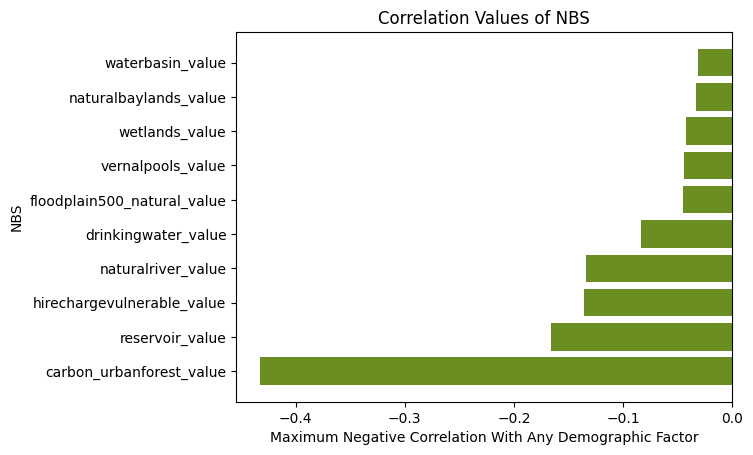

In [9]:
import matplotlib.pyplot as plt

plt.barh(neg_tbl['NBS'], neg_tbl['Correlation'], color='olivedrab')
plt.title('Correlation Values of NBS')
plt.ylabel('NBS')
plt.xlabel('Maximum Negative Correlation With Any Demographic Factor')
plt.show()

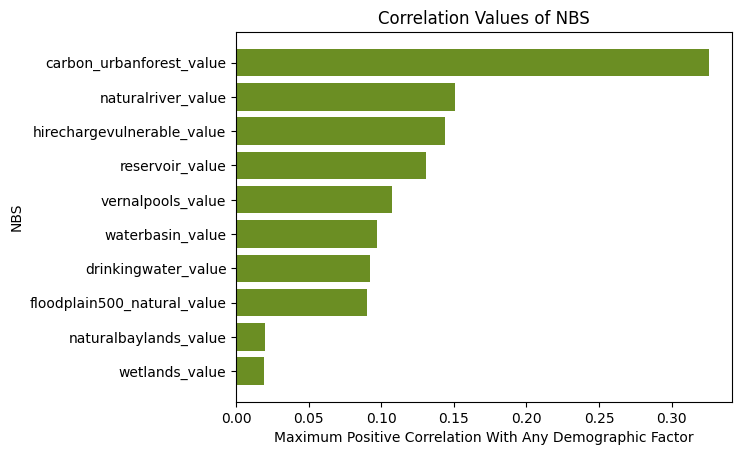

In [10]:
import matplotlib.pyplot as plt

plt.barh(pos_tbl['NBS'], pos_tbl['Correlation'], color='olivedrab')
plt.title('Correlation Values of NBS')
plt.ylabel('NBS')
plt.xlabel('Maximum Positive Correlation With Any Demographic Factor')
plt.show()

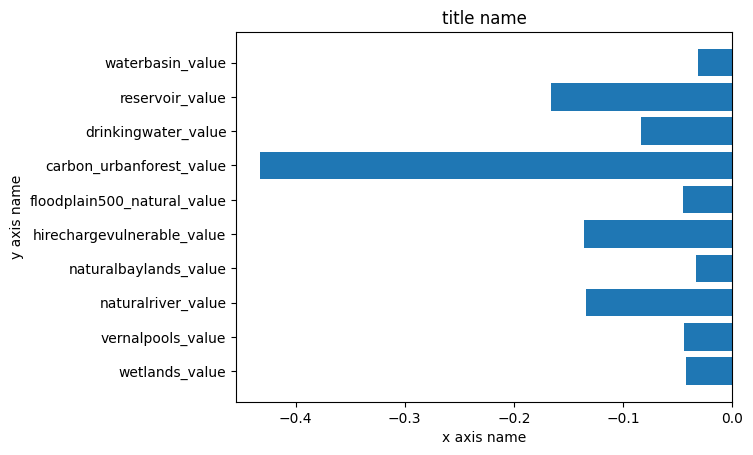

In [11]:
import matplotlib.pyplot as plt

plt.barh(yes, ha)
plt.title('title name')
plt.ylabel('y axis name')
plt.xlabel('x axis name')
plt.show()

<AxesSubplot: xlabel='NBS', ylabel='Correlation'>

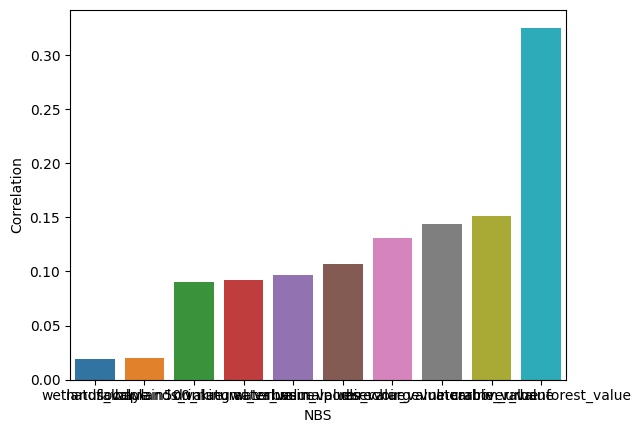

In [12]:
sns.barplot(data=pos_tbl, x="NBS", y="Correlation")

<AxesSubplot: xlabel='NBS', ylabel='Correlation'>

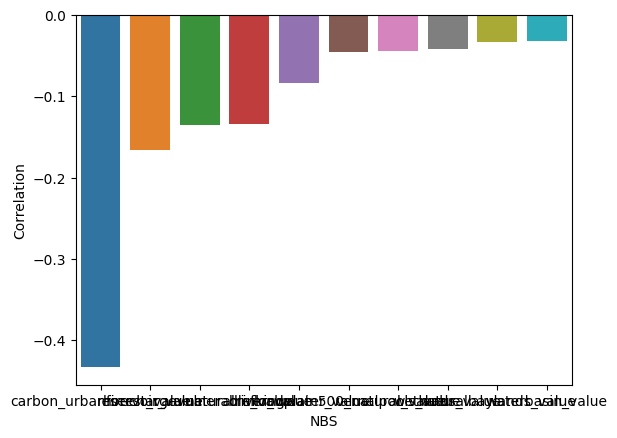

In [13]:
sns.barplot(data=neg_tbl, x="NBS", y="Correlation")

In [14]:
for c in climate_risk_carrie:
    most_corrolated_demographic(master_data, demographics, c)

morewater_hotdry_value has a 0.11030188023490109 corrolation with OVER64PCT
morewater_warmwet_value has a 0.12226597469009955 corrolation with OVER64PCT
floodplain100_value has a 0.08389393116428633 corrolation with OVER64PCT
floodplain500_value has a 0.0887048847981459 corrolation with OVER64PCT
slr2050_value has a 0.012107091454437016 corrolation with UNEMPPCT
slr2100_value has a 0.013750471875044003 corrolation with UNEMPPCT
historicalfire_value has a 0.09570571003360251 corrolation with OVER64PCT
wu_interface_value has a 0.29338461578075375 corrolation with OVER64PCT
firehazard_value has a 0.07994743403900055 corrolation with OVER64PCT
urbheatisland_air_value has a 0.204256725248026 corrolation with ACSIPOVBAS


In [15]:
for d in demographics:
    most_corrolated_nbs(master_data, d, NBS)
    

ACSTOTPOP has a 0.09026037556855307 corrolation with waterbasin_value
ACSIPOVBAS has a 0.09676008908828156 corrolation with waterbasin_value
ACSEDUCBAS has a 0.05559028445921131 corrolation with vernalpools_value
ACSTOTHH has a 0.07175176657987158 corrolation with vernalpools_value
ACSTOTHU has a 0.07697895696853517 corrolation with vernalpools_value
ACSUNEMPBAS has a 0.062162594614495054 corrolation with waterbasin_value
MINORPCT has a 0.009028984304943543 corrolation with naturalbaylands_value
LOWINCPCT has a 0.013865148578138777 corrolation with naturalbaylands_value
LESSHSPCT has a 0.048901956941166266 corrolation with waterbasin_value
LINGISOPCT has a 0.011245589155565009 corrolation with vernalpools_value
UNDER5PCT has a 0.05491228684297317 corrolation with waterbasin_value
OVER64PCT has a 0.3254922566898827 corrolation with carbon_urbanforest_value
UNEMPPCT has a 0.03634154861621813 corrolation with vernalpools_value


In [16]:
for d in demographics:
    least_corrolated_nbs(master_data, d, NBS)

ACSTOTPOP has a -0.038797956602373354 corrolation with hirechargevulnerable_value
ACSIPOVBAS has a -0.035594928437243004 corrolation with hirechargevulnerable_value
ACSEDUCBAS has a -0.028731198178631016 corrolation with reservoir_value
ACSTOTHH has a -0.03337822224345494 corrolation with reservoir_value
ACSTOTHU has a -0.017709474108296284 corrolation with reservoir_value
ACSUNEMPBAS has a -0.10588389987560798 corrolation with carbon_urbanforest_value
MINORPCT has a -0.4327322799236715 corrolation with carbon_urbanforest_value
LOWINCPCT has a -0.26575474840509455 corrolation with carbon_urbanforest_value
LESSHSPCT has a -0.28227365711896113 corrolation with carbon_urbanforest_value
LINGISOPCT has a -0.2744926714471329 corrolation with carbon_urbanforest_value
UNDER5PCT has a -0.15566397786199584 corrolation with carbon_urbanforest_value
OVER64PCT has a -0.011036580161316624 corrolation with waterbasin_value
UNEMPPCT has a -0.06997192393014239 corrolation with carbon_urbanforest_value


The two above tables show which nature based solution each demographic factor is most and least correlated with. Can see which demographic factors are/aren't very correlated with any nature based solution

In [17]:
demographics_f = ['Total Population', 'Population in Poverty', 'Population age 25+', 'Limited English Speaking Households', 'Housing Units', 
    'Unemployment Rate', '% People of Color', '% Low Income', '% Less than HS Education',
    '% Limited English Speaking Households', '% Under age 5',  '% Over age 64',
    '% Unemployed']

no = []
lol = []

for d in demographics:
    no = np.append(no, most_corrolated_nbs(master_data, d, NBS)[0])
    lol = np.append(lol, most_corrolated_nbs(master_data, d, NBS)[1])

pos_tbl_dem = pd.DataFrame({'Demographic': no, 'Correlation': lol})
pos_tbl_dem['Demographic Full'] = demographics_f
pos_tbl_dem = pos_tbl_dem.sort_values('Correlation', ascending=False)
pos_tbl_dem = pos_tbl_dem.head()
pos_tbl_dem

ACSTOTPOP has a 0.09026037556855307 corrolation with waterbasin_value
ACSTOTPOP has a 0.09026037556855307 corrolation with waterbasin_value
ACSIPOVBAS has a 0.09676008908828156 corrolation with waterbasin_value
ACSIPOVBAS has a 0.09676008908828156 corrolation with waterbasin_value
ACSEDUCBAS has a 0.05559028445921131 corrolation with vernalpools_value
ACSEDUCBAS has a 0.05559028445921131 corrolation with vernalpools_value
ACSTOTHH has a 0.07175176657987158 corrolation with vernalpools_value
ACSTOTHH has a 0.07175176657987158 corrolation with vernalpools_value
ACSTOTHU has a 0.07697895696853517 corrolation with vernalpools_value
ACSTOTHU has a 0.07697895696853517 corrolation with vernalpools_value
ACSUNEMPBAS has a 0.062162594614495054 corrolation with waterbasin_value
ACSUNEMPBAS has a 0.062162594614495054 corrolation with waterbasin_value
MINORPCT has a 0.009028984304943543 corrolation with naturalbaylands_value
MINORPCT has a 0.009028984304943543 corrolation with naturalbaylands_valu

,Demographic,Correlation,Demographic Full
11,OVER64PCT,0.325492,% Over age 64
1,ACSIPOVBAS,0.096760,Population in Poverty
0,ACSTOTPOP,0.090260,Total Population
4,ACSTOTHU,0.076979,Housing Units
3,ACSTOTHH,0.071752,Limited English Speaking Households


In [18]:
demographics_f = ['Total Population', 'Population in Poverty', 'Population age 25+', 'Limited English Speaking Households', 'Housing Units', 
    'Unemployment Rate', '% People of Color', '% Low Income', '% Less than HS Education',
    '% Limited English Speaking Households', '% Under age 5',  '% Over age 64',
    '% Unemployed']

yes = []
ha = []

for d in demographics:
    yes = np.append(yes, least_corrolated_nbs(master_data, d, NBS)[0])
    ha = np.append(ha, least_corrolated_nbs(master_data, d, NBS)[1])

neg_tbl_dem = pd.DataFrame({'Demographic': yes, 'Correlation': ha})
neg_tbl_dem['Demographic Full'] = demographics_f
neg_tbl_dem = neg_tbl_dem.sort_values('Correlation', ascending=True)
neg_tbl_dem = neg_tbl_dem.head()

ACSTOTPOP has a -0.038797956602373354 corrolation with hirechargevulnerable_value
ACSTOTPOP has a -0.038797956602373354 corrolation with hirechargevulnerable_value
ACSIPOVBAS has a -0.035594928437243004 corrolation with hirechargevulnerable_value
ACSIPOVBAS has a -0.035594928437243004 corrolation with hirechargevulnerable_value
ACSEDUCBAS has a -0.028731198178631016 corrolation with reservoir_value
ACSEDUCBAS has a -0.028731198178631016 corrolation with reservoir_value
ACSTOTHH has a -0.03337822224345494 corrolation with reservoir_value
ACSTOTHH has a -0.03337822224345494 corrolation with reservoir_value
ACSTOTHU has a -0.017709474108296284 corrolation with reservoir_value
ACSTOTHU has a -0.017709474108296284 corrolation with reservoir_value
ACSUNEMPBAS has a -0.10588389987560798 corrolation with carbon_urbanforest_value
ACSUNEMPBAS has a -0.10588389987560798 corrolation with carbon_urbanforest_value
MINORPCT has a -0.4327322799236715 corrolation with carbon_urbanforest_value
MINORPCT 

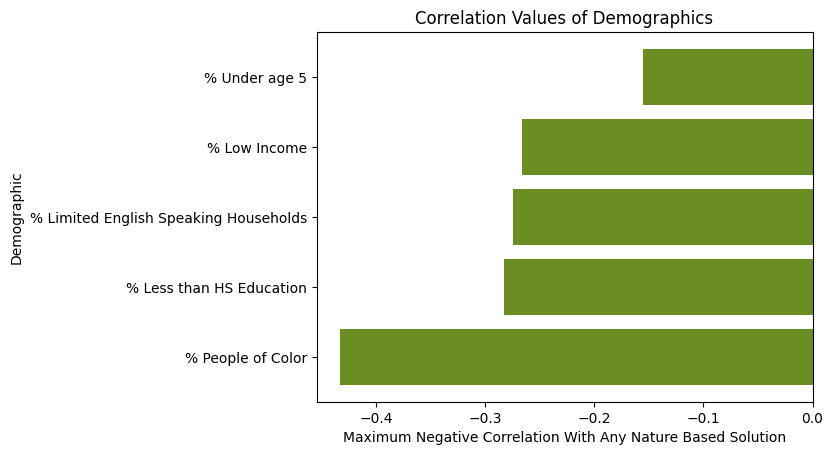

In [19]:
plt.barh(neg_tbl_dem['Demographic Full'], neg_tbl_dem['Correlation'], color='olivedrab')
plt.title('Correlation Values of Demographics')
plt.ylabel('Demographic')
plt.xlabel('Maximum Negative Correlation With Any Nature Based Solution')
plt.show()

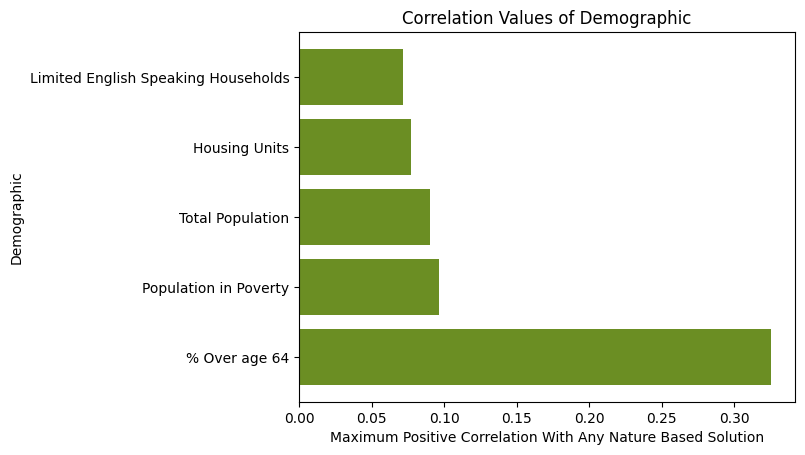

In [20]:
plt.barh(pos_tbl_dem['Demographic Full'], pos_tbl_dem['Correlation'], color='olivedrab')
plt.title('Correlation Values of Demographic')
plt.ylabel('Demographic')
plt.xlabel('Maximum Positive Correlation With Any Nature Based Solution')
plt.show()

In [21]:
name = []
corr = []

for n in NBS:
    name.append(n)
    corr.append(np.corrcoef(master_data[n], master_data["MINORPCT"])[0][1])

corr_minorpct = pd.DataFrame({'NBS': name, 'Correlation': corr})
corr_minorpct = corr_minorpct.sort_values('Correlation', ascending=True)
corr_minorpct


,NBS,Correlation
6,carbon_urbanforest_value,-0.432732
8,reservoir_value,-0.165635
4,hirechargevulnerable_value,-0.135437
2,naturalriver_value,-0.134193
7,drinkingwater_value,-0.083212
5,floodplain500_natural_value,-0.045447
1,vernalpools_value,-0.020439
0,wetlands_value,-0.010876
9,waterbasin_value,0.001039
3,naturalbaylands_value,0.009029


In [22]:
name = []
corr = []

for n in NBS:
    name.append(n)
    corr.append(np.corrcoef(master_data[n], master_data["OVER64PCT"])[0][1])

corr_minorpct = pd.DataFrame({'NBS': name, 'Correlation': corr})
corr_minorpct = corr_minorpct.sort_values('Correlation', ascending=True)
corr_minorpct

,NBS,Correlation
9,waterbasin_value,-0.011037
3,naturalbaylands_value,-0.001675
0,wetlands_value,0.018928
5,floodplain500_natural_value,0.090221
7,drinkingwater_value,0.092213
1,vernalpools_value,0.107102
8,reservoir_value,0.130530
4,hirechargevulnerable_value,0.144171
2,naturalriver_value,0.150893
6,carbon_urbanforest_value,0.325492


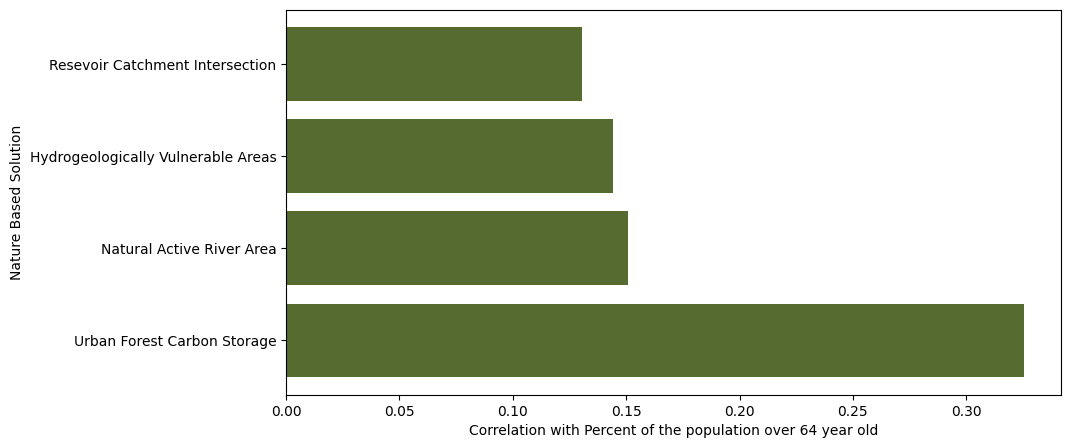

In [23]:
#NBS_factor_unused = ['carbon_urbanforest_value', 'naturalriver_value', 'hirechargevulnerable_value', 'reservoir_value']
NBS_factor = ['Urban Forest Carbon Storage', 'Natural Active River Area', 'Hydrogeologically Vulnerable Areas', 'Resevoir Catchment Intersection']
ub = [0.32549225668988274,  0.1508932185280221, 0.14417132005272779, 0.13052953934743933]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(NBS_factor, ub, color='darkolivegreen')
#plt.title('Correlation between demographic factors and carbon urbanforest value')
plt.ylabel('Nature Based Solution')
plt.xlabel('Correlation with Percent of the population over 64 year old')
plt.show()

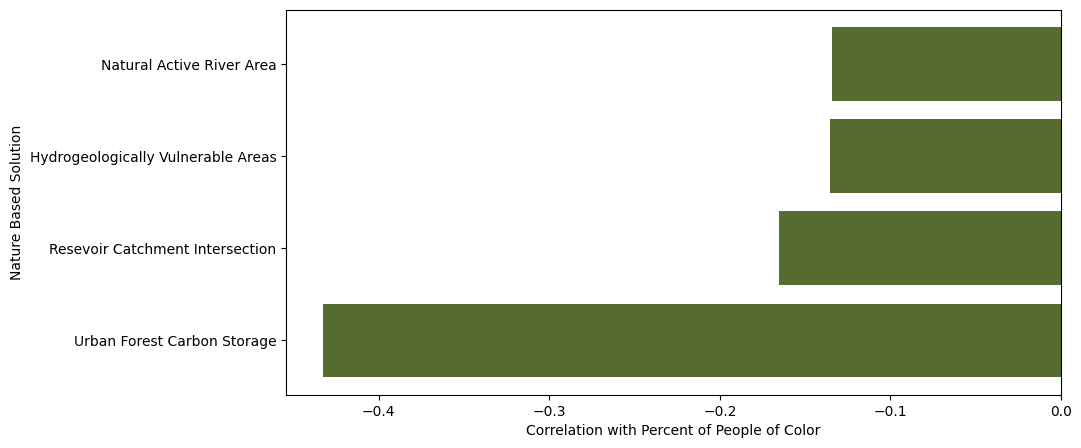

In [24]:
#NBS_factor_unused = ['carbon_urbanforest_value',   'reservoir_value','hirechargevulnerable_value', 'naturalriver_value']
NBS_factor = ['Urban Forest Carbon Storage',  'Resevoir Catchment Intersection', 'Hydrogeologically Vulnerable Areas','Natural Active River Area']
ub = [-0.4327322799236716,  -0.16563518092459067, -0.13543712551984277, -0.13419268809370075]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(NBS_factor, ub, color='darkolivegreen')
#plt.title('Correlation between demographic factors and carbon urbanforest value')
plt.ylabel('Nature Based Solution')
plt.xlabel('Correlation with Percent of People of Color')
plt.show()

<AxesSubplot: >

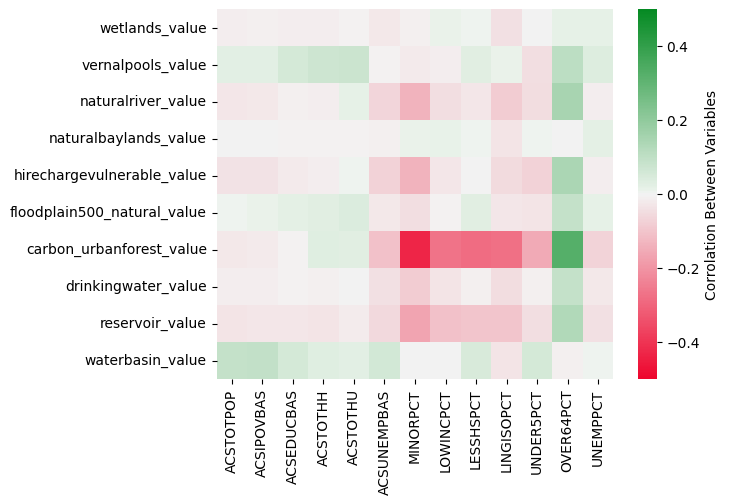

In [25]:
dem_list = []
for d in demographics:
    dem_list.append(d)

df = pd.DataFrame(columns=dem_list)

for n in NBS:
    corr = []
    for d in demographics:
        corr.append(np.corrcoef(master_data[n], master_data[d])[0][1])
    #print(corr)
    df.loc[n] = corr 

rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=50, sep=3, as_cmap=True)
vmax= 0.5
sns.heatmap(df,cmap=rdgn,vmin=-vmax, vmax=vmax,cbar_kws={'label': 'Corrolation Between Variables'})
#df

<AxesSubplot: >

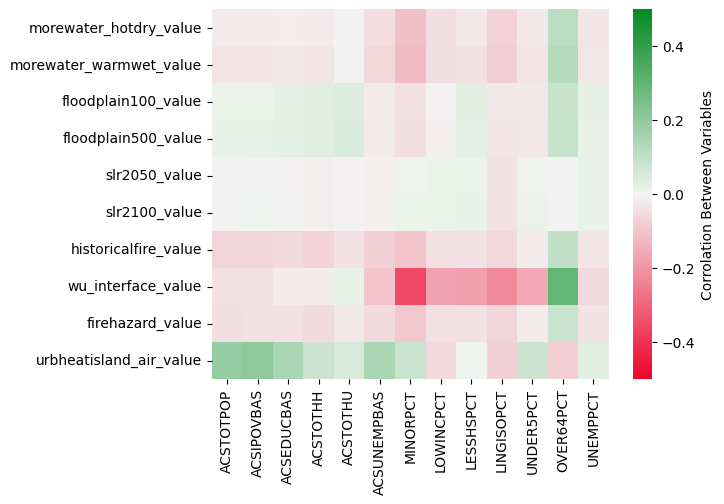

In [33]:
dem_list = []
for d in demographics:
    dem_list.append(d)

df = pd.DataFrame(columns=dem_list)

for c in climate_risk_carrie:
    corr = []
    for d in demographics:
        corr.append(np.corrcoef(master_data[c], master_data[d])[0][1])
    #print(corr)
    df.loc[c] = corr 

rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=50, sep=3, as_cmap=True)
vmax= 0.5
sns.heatmap(df,cmap=rdgn,vmin=-vmax, vmax=vmax,cbar_kws={'label': 'Corrolation Between Variables'})
#df

<AxesSubplot: >

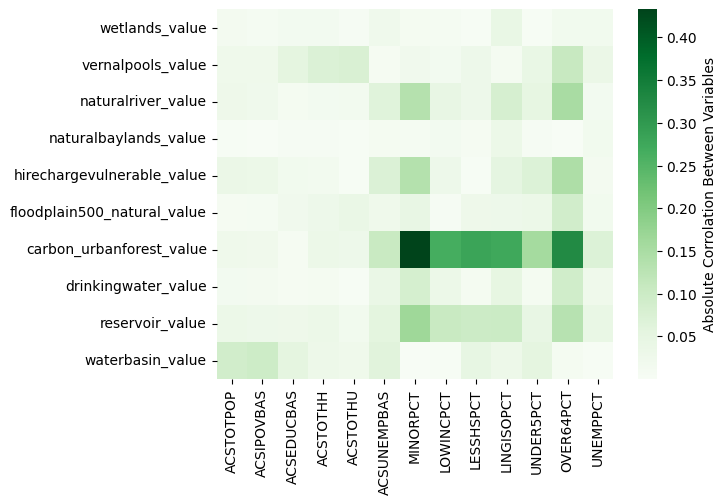

In [26]:
dem_list = []
for d in demographics:
    dem_list.append(d)

df = pd.DataFrame(columns=dem_list)

for n in NBS:
    corr = []
    for d in demographics:
        corr.append(abs(np.corrcoef(master_data[n], master_data[d])[0][1]))
    #print(corr)
    df.loc[n] = corr 

rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=50, sep=3, as_cmap=True)
vmax= 0.5
sns.heatmap(df,cmap="Greens",cbar_kws={'label': 'Absolute Corrolation Between Variables'})

## Finding correlations with filtered data

280       338
356         4
357      1468
358         2
359      1622
392       199
398       453
399      1739
434         2
535        66
539       564
543        27
678       262
682        54
696        55
702       483
706       442
1579      352
1586       12
1588     1678
1590       30
1600     3450
1604      338
1607       47
1608      586
1609      442
1617      288
1626      139
1627       93
1630     3759
1634    25226
1635      826
1636       29
1637      551
1655       61
1658       29
1661      110
1662      315
1666       27
1672       38
1681       15
1684       79
1703        1
1704      100
1710      489
1714      349
1720      263
1721      504
1722       63
1723      194
1727       44
1741       31
1742        1
1743       91
1744       19
Name: vernalpools_value, dtype: int64

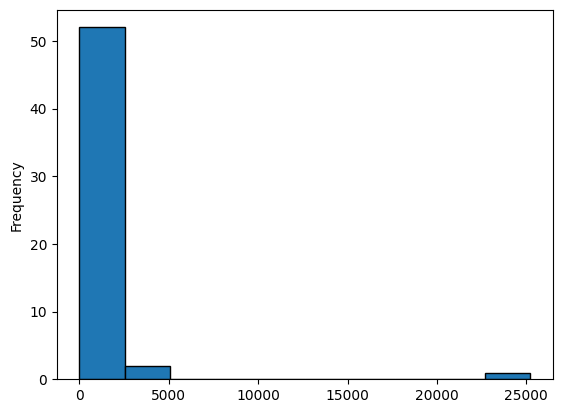

In [27]:
master_data[master_data['vernalpools_value']>0]['vernalpools_value'].plot(kind='hist', edgecolor='black')


master_data[master_data['vernalpools_value']>0]['vernalpools_value']

In [28]:
for d in demographics:
     print(d, np.corrcoef(master_data[master_data['vernalpools_value']>0][d], master_data[master_data['vernalpools_value']>0]['vernalpools_value'])[0][1])

ACSTOTPOP 0.09163268254036211
ACSIPOVBAS 0.08771450952460474
ACSEDUCBAS 0.2579242225287812
ACSTOTHH 0.3653502957019819
ACSTOTHU 0.41016486542351993
ACSUNEMPBAS -0.03645046943437243
MINORPCT 0.06628559138008588
LOWINCPCT -0.09393323116943257
LESSHSPCT 0.25673032244998284
LINGISOPCT 0.31875809480139533
UNDER5PCT -0.25295370633136155
OVER64PCT 0.45485474146074284
UNEMPPCT 0.2562310849446748


In [29]:
master_data[master_data['wetlands_value']>0]['wetlands_value']

16        45
30         3
80        22
97       696
107        5
        ... 
1732      33
1733      30
1734      10
1753    1062
1754      69
Name: wetlands_value, Length: 386, dtype: int64

In [30]:
for d in demographics:
     print(d, np.corrcoef(master_data[master_data['wetlands_value']>0][d], master_data[master_data['wetlands_value']>0]['wetlands_value'])[0][1])

ACSTOTPOP -0.047124113136226976
ACSIPOVBAS -0.04424388505393925
ACSEDUCBAS -0.05309662703428229
ACSTOTHH -0.048933140379722906
ACSTOTHU -0.03705194102101666
ACSUNEMPBAS -0.05175790167032496
MINORPCT 0.029907532448302163
LOWINCPCT 0.06348659847341015
LESSHSPCT 0.058112031691161
LINGISOPCT -0.04409767694983941
UNDER5PCT 0.017488320831638492
OVER64PCT -0.011380707733576982
UNEMPPCT 0.04084982686685101


In [31]:
for d in demographics:
     print(d, np.corrcoef(master_data[master_data['slr2050_value']>0][d], master_data[master_data['slr2050_value']>0]['slr2050_value'])[0][1])

ACSTOTPOP 0.013026388971764414
ACSIPOVBAS 0.019536124299139312
ACSEDUCBAS -0.005358079659795372
ACSTOTHH -0.03260951311904523
ACSTOTHU -0.027162959481648825
ACSUNEMPBAS -0.023675885160316965
MINORPCT -0.0012203301134445154
LOWINCPCT -0.010334302395298662
LESSHSPCT 0.004618037171448453
LINGISOPCT -0.10781568487150367
UNDER5PCT -0.02348456231477103
OVER64PCT 0.027713151316921012
UNEMPPCT 0.02064408214411585


In [32]:
#for d in demographics:
#     print(d, np.corrcoef(master_data[master_data['reservoir_value']>0][d], master_data[master_data['reservoir_value']>0]['reservoir_value'])[0][1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08c08e4f-c970-41e1-98db-afa3328b10c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>